## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from scipy import ndimage

## Read Image

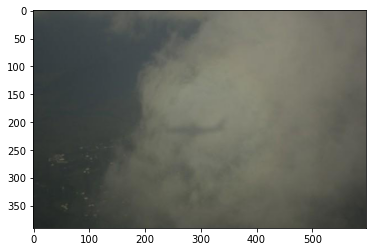

In [3]:
img = iio.imread('q3.jpeg')
plt.figure()
plt.imshow(img)
plt.show()

## Single Scale Retinex

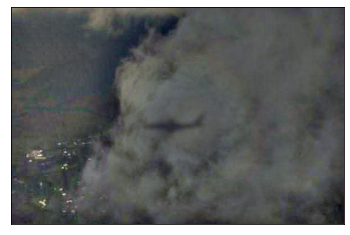

In [4]:
def gaussian_kernel(n, sigma):
    kernel = np.zeros((n, n))
    i = np.linspace(0,n,n)-n//2
    kernel = np.exp(-i**2/(2*sigma**2))
    kernel = np.outer(kernel, kernel)
    kernel = kernel/np.sum(kernel)
    return kernel


def SSR(img, kernel):
    '''
    img is a grayscale image,
    kernel is the window for calculate average
    '''
    
    img = img.copy()
    x, y = img.shape
    n = kernel.shape[0]
    m = (n-1)//2
    r = np.zeros(img.shape)
    
    conv_img = ndimage.convolve(img, kernel)
    r = np.log10(img) - np.log10(conv_img)
    
    return (r-np.min(r))/(np.max(r)-np.min(r))

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

kernel = gaussian_kernel(131,80)

ssr_r = SSR(r, kernel)
ssr_g = SSR(g, kernel)
ssr_b = SSR(b, kernel)

ssr_img = np.dstack((ssr_r, ssr_g, ssr_b))

plt.figure()
plt.imshow(np.array(255*ssr_img, dtype='uint8'))
plt.xticks([])
plt.yticks([])
plt.show()

iio.imwrite('q3_SSR.jpeg', np.uint8(255*ssr_img))

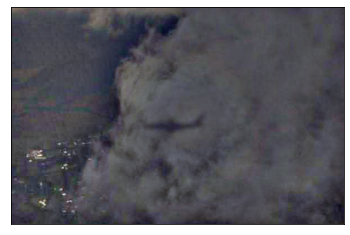

In [6]:
def MSR(img, sigma=[15, 80, 250], weight=[1/3, 1/3, 1/3]):
    r = np.zeros(img.shape)
    for i in range(len(weight)):
        kernel = gaussian_kernel(131, sigma[i])
        r += weight[i]*(np.log10(img)-np.log10(ndimage.convolve(img, kernel)))
    return (r-np.min(r))/(np.max(r)-np.min(r))

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

msr_r = MSR(r)
msr_g = MSR(g)
msr_b = MSR(b)

msr_img = np.dstack((msr_r, msr_g, msr_b))

plt.figure()
plt.imshow(np.array(msr_img/np.max(msr_img)*255, dtype='uint8'))
plt.xticks([])
plt.yticks([])
plt.show()
iio.imwrite('q3_MSR.jpeg', np.uint8(msr_img/np.max(msr_img)*255))

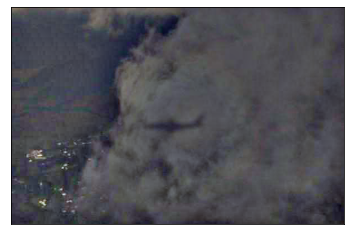

In [7]:
def MSRCR(img, alpha=125, beta=46, b=-30, G=192):
    img = np.float64(img.copy())
    output = np.float64(img.copy())
    for i in range(output.shape[2]):
        MSR_img = MSR(img[:,:,i])
        for j in range(output.shape[1]):
            for k in range(output.shape[0]):
                output[k,j,i] = MSR_img[k,j]*beta*np.log10(alpha*img[k,j,i]/(img[k,j,0]+img[k,j,1]+img[k,j,2]))
    output = G*(output-b)
    return (output-np.min(output))/(np.max(output)-np.min(output))*255

msrcr_img = MSRCR(img)
plt.figure()
plt.imshow(np.array(msrcr_img, dtype='uint8'))
plt.xticks([])
plt.yticks([])
plt.show()
iio.imwrite('q3_MSRCR.jpeg', np.uint8(msrcr_img))